<a href="https://colab.research.google.com/github/NehaKumari500092077/Visual-Computing/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Harris Corner Detection (10 Marks)

(Note: You can directly use OpenCV for operations like gradient computation, Gaussian weighting etc. There is no need to implement the corresponding convolution operations from scratch. However, all the steps for Harris corner detector must be implemented).

1. Implementing Harris Corner Detector (4 Marks)

   (Implement the Harris Corner Detector algorithm from scratch)

2. ApplyingtheAlgorithmtoboxes.png(1Marks)

   (Apply the implemented algorithm to detect corners in boxes.png)

3. VisualizationofDetectedCorners(2Marks)

   (Visualize the detected corners by marking them on the image.)

4. Report:NumberofDetectedCorners(1Mark)

   (Report the total number of corners detected in the image.)

5. ComparisonwithOpenCV’simplementation(2Marks)

   (Compare your results with OpenCV’s implementation of Harris corner
detector and explain any differences observed)

In [30]:
# import all the necessary library
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Load the image
img_path = '/content/boxes.png'
img = cv2.imread(img_path)

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

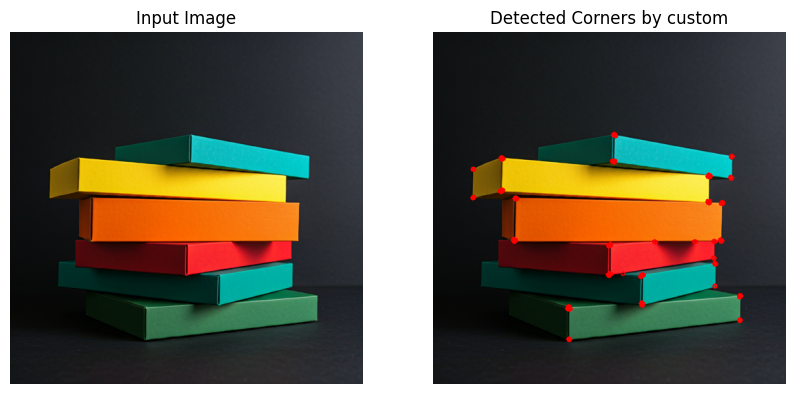

Number of corners detected: 297


In [32]:

# task 1
def custom_harris_corner_detection(gray_img, gaussian_window_size=3, Harris_detector_const=0.04, threshold=0.01):

    # Compute x and y gradients using Sobel filters
    x_gradients = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
    y_gradients = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)

    # Compute products of derivatives
    Ixx = x_gradients ** 2
    Iyy = y_gradients ** 2
    Ixy = x_gradients * y_gradients

    # Apply Gaussian filter to the products of derivatives
    Ixx = cv2.GaussianBlur(Ixx, (gaussian_window_size, gaussian_window_size), sigmaX=1)
    Iyy = cv2.GaussianBlur(Iyy, (gaussian_window_size, gaussian_window_size), sigmaX=1)
    Ixy = cv2.GaussianBlur(Ixy, (gaussian_window_size, gaussian_window_size), sigmaX=1)

    # Compute the determinant and trace of the structure tensor
    determinant = Ixx * Iyy - Ixy ** 2
    trace = Ixx + Iyy

    # Compute Harris response
    harris_response = determinant - Harris_detector_const * (trace ** 2)

    # Threshold the response to identify corners
    corners = np.zeros_like(harris_response)
    corners[harris_response > threshold * harris_response.max()] = 255

    # Find the coordinates of corners
    corner_coords = np.argwhere(corners == 255)

    return corners, corner_coords, harris_response


# task 2
# Apply Harris corner detector to the grayscale image
custom_corners, custom_corner_coords, custom_harris_response = custom_harris_corner_detection(gray_img)


# task 3
# Mark the detected corners on the original(input) image
custom_corner_marked_img = img.copy()
for y_coords, x_coords in custom_corner_coords:
    cv2.circle(custom_corner_marked_img, (x_coords, y_coords), radius=3, color=(0, 0, 255), thickness=1)

# Visualize the original(input) image and corner-marked images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.axis('off')

# Visualize the corner-marked images
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(custom_corner_marked_img, cv2.COLOR_BGR2RGB))
plt.title('Detected Corners by custom')
plt.axis('off')

plt.show()


# task 4
# count the number of detected corners
custom_no_of_corners = len(custom_corner_coords)
print(f"Number of corners detected: {custom_no_of_corners}")


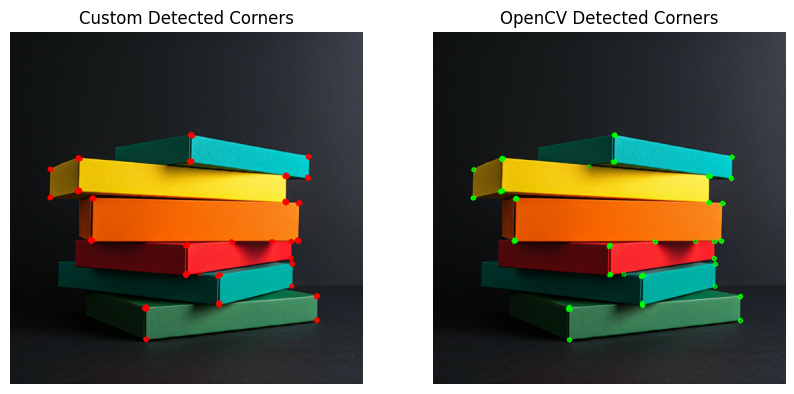

Number of corners detected by custom: 297
Number of corners detected by OpenCV: 167


In [34]:
# task 5

# Parameters for OpenCV Harris Corner Detection
block_size = 2   # It is the size of neighbourhood considered for corner detection
ksize = 3        # Aperture parameter for the Sobel operator
k = 0.04         # Harris detector free parameter

# Apply OpenCV's Harris corner detection
opencv_harris_response = cv2.cornerHarris(gray_img, block_size, ksize, k)

# Threshold for marking detected corners in the OpenCV result
opencv_corners = np.zeros_like(opencv_harris_response)
opencv_corners[opencv_harris_response > 0.01 * opencv_harris_response.max()] = 255

# Finding the coordinates of OpenCV-detected corners
opencv_corner_coords = np.argwhere(opencv_corners == 255)

# Mark the OpenCV-detected corners on the original image
opencv_corner_marked_img = img.copy()
for y_coords, x_coords in opencv_corner_coords:
    cv2.circle(opencv_corner_marked_img, (x_coords, y_coords), radius=3, color=(0, 255, 0), thickness=1)

# show the image with Custom-detected corners and OpenCV-detected corners
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(custom_corner_marked_img, cv2.COLOR_BGR2RGB))
plt.title('Custom Detected Corners')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(opencv_corner_marked_img, cv2.COLOR_BGR2RGB))
plt.title('OpenCV Detected Corners')
plt.axis('off')

plt.show()

# show the number of detected corners by custom
print(f"Number of corners detected by custom: {custom_no_of_corners}")

# count the number of corners detected by OpenCV
opencv_no_of_corners = len(opencv_corner_coords)
print(f"Number of corners detected by OpenCV: {opencv_no_of_corners}")


The custom implementation detected 297 corners, while OpenCV detected 167. This difference is mainly due to thresholding: the custom implementation likely uses a lower threshold, leading to more corners, including weak or noisy ones. OpenCV’s implementation is more optimized, with better noise handling and gradient computation, leading to fewer but more distinct corners. Additionally, OpenCV’s internal parameter tuning results in more accurate and efficient corner detection, while the custom version is more sensitive to minor intensity changes.

#Task 2: Hough Transform for Circle Detection (10 Marks)


In [ ]:
# Load the image and resize it to 128x128 for computational efficiency (as given in question)
img_path = '/content/clocks.png'
img = cv2.imread(img_path)
resized_img = cv2.resize(img, (128, 128))
gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

1. CannyEdgeDetection(2Marks)

  (Use OpenCV’s Canny edge detector to generate the edge map from
clocks.png. Show the edge map.)

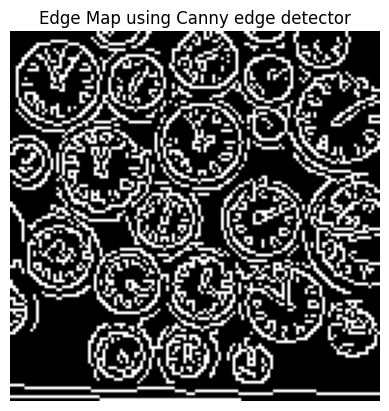

In [9]:
# Apply OpenCV’s Canny Edge Detection
edge_map = cv2.Canny(gray_img, threshold1=100, threshold2=200)

# Show the edge map
plt.imshow(edge_map, cmap='gray')
plt.title('Edge Map using Canny edge detector')
plt.axis('off')
plt.show()


2. ImplementingHoughTransformforCircleDetection(4Marks)

  (Implement the Hough Transform for circle detection from scratch using the edge map obtained in the first step.)

In [27]:
# Custom Hough Transform for Circle Detection
def custom_hough_transform_for_circles(edges, min_radius, max_radius):
    rows, columns = edges.shape
    radius_values = range(min_radius, max_radius + 1)

    # Accumulator array (x, y, radius)
    acc = np.zeros((rows, columns, len(radius_values)), dtype=np.int32)

    # Edge coordinates (non-zero points)
    edge_points = np.argwhere(edges > 0)

    # For each edge point, vote in the accumulator array
    for x_coords, y_coords in edge_points:
        for r_idx, r in enumerate(radius_values):
            for theta in range(0, 360, 1):
                a = int(x_coords - r * np.cos(np.deg2rad(theta)))  # Circle's center x
                b = int(y_coords - r * np.sin(np.deg2rad(theta)))  # Circle's center y

                if 0 <= a < rows and 0 <= b < columns:
                    acc[a, b, r_idx] += 1  # Voting in the accumulator

    return acc

3. ApplyingtheHoughTransformtoDetectClocks(1Marks)

  (Apply the implemented algorithm to detect clocks in the clocks.png
image. How many clocks are detected by the algorithm you implemented?)

In [28]:
# Apply the Hough Transform to detect circles (clocks)

# Apply OpenCV’s Canny Edge Detection
edge = cv2.Canny(gray_img, 100, 200)

# Assuming clocks have radii between 15 and 40 pixels
minRadius, maxRadius = 15, 40
acc = custom_hough_transform_for_circles(edge, minRadius, maxRadius)

# Find circles with the most votes
thresh = 170
detected_circles_custom = np.argwhere(acc > thresh)

# Count the number of detected circles
num_of_circles = len(detected_circles_custom)
print(f"Number of clocks detected by custom: {num_of_circles}")


Number of clocks detected by custom: 26


4. VisualizationofDetectedCircles(1Marks)

  (Visualize the detected circles by annotating them on the image.)

  (Note: since Hough transform is computationally intensive, you can resize the given image to a smaller resolution like 128 ✕ 128 and use it for steps 1-4).

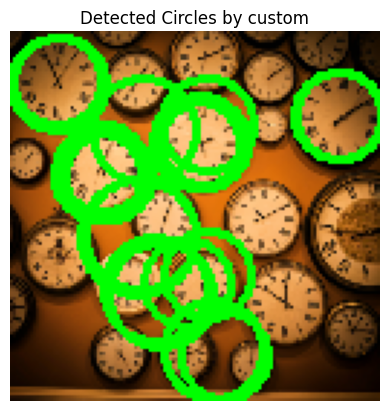

In [29]:
# Draw the detected circles on the image
custom_output_image = resized_img.copy()

for a, b, r_idx in detected_circles_custom:
    radius = minRadius + r_idx
    cv2.circle(custom_output_image, (b, a), radius, (0, 255, 0), 2)  # Draw a green circle

# Show the image with detected circles
plt.imshow(cv2.cvtColor(custom_output_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Circles by custom')
plt.axis('off')
plt.show()

5. ComparisonwithOpenCV’simplementation(2Marks)

  (Compare your results with OpenCV’s Hough Circle Transform and explain
any differences. Report the number of clocks detected by OpenCV in this case.)


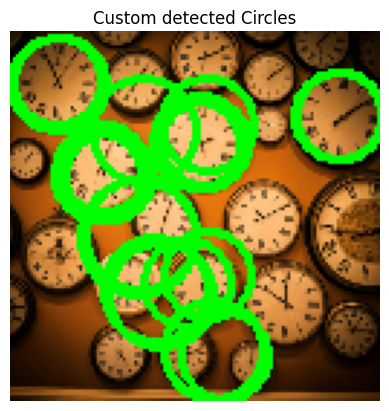

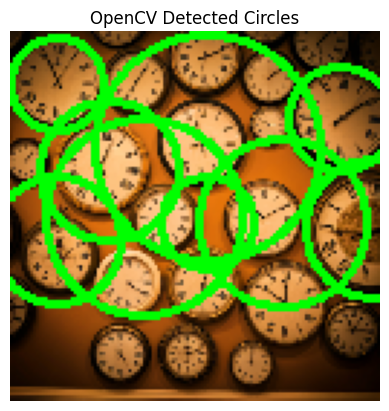

Number of clocks detected by custom: 26
Number of clocks detected by OpenCV: 9


In [8]:
# OpenCV's Hough Circle Transform
detected_circles_opencv = cv2.HoughCircles(
    gray_img,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=20,
    param1=50, param2=30,
    minRadius=15, maxRadius=40
)

# Draw OpenCV detected circles on the image
opencv_output_image = resized_img.copy()

if detected_circles_opencv is not None:
    detected_circles_opencv = np.uint16(np.around(detected_circles_opencv))
    for circle in detected_circles_opencv[0, :]:
        cv2.circle(opencv_output_image, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)  # Green circle


# Show the image with Custom-detected circles
plt.imshow(cv2.cvtColor(custom_output_image, cv2.COLOR_BGR2RGB))
plt.title('Custom detected Circles')
plt.axis('off')
plt.show()

# Show the image with OpenCV-detected circles
plt.imshow(cv2.cvtColor(opencv_output_image, cv2.COLOR_BGR2RGB))
plt.title('OpenCV Detected Circles')
plt.axis('off')
plt.show()

# Show the number of detected circles by
print(f"Number of clocks detected by custom: {num_of_circles}")

# Count number of circles detected by OpenCV
num_of_circles_opencv = len(detected_circles_opencv[0, :]) if detected_circles_opencv is not None else 0
print(f"Number of clocks detected by OpenCV: {num_of_circles_opencv}")


The custom Hough Circle Transform detected 26 circles, while OpenCV detected only 9. The custom implementation likely over-detected due to a lower voting threshold, picking up noise and redundant circles. OpenCV’s method is more selective, with better noise handling and suppression of false positives. Its internal optimizations ensure more accurate and efficient detection. The custom method, though detecting more, may not be as reliable as OpenCV's.